In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
old = pd.read_csv('Results of sims/Sims/200528_5stepsLunch_AllSims_ControlRespNonResp.csv')

In [12]:
old = old[old['Test'] == 'Control']

In [15]:
old = old.drop('Test', axis = 1)
old = old.drop('Staff_Type', axis = 1)

In [17]:
old.shape

(1000, 39)

In [72]:
new = pd.read_csv('Results of sims/Sims/200528_streamlined_test.csv')

In [73]:
new = new.set_index('Unnamed: 0').T

In [74]:
new.shape

(1000, 39)

In [75]:
new.columns

Index(['Arrivals_check_in', 'Served_check_in', 'Mean_serve_time_check_in',
       'Mean_wait_time_check_in', 'Max_wait_time_check_in',
       'Arrivals_refine_complaint', 'Served_refine_complaint',
       'Mean_serve_time_refine_complaint', 'Mean_wait_time_refine_complaint',
       'Max_wait_time_refine_complaint', 'Arrivals_exam', 'Served_exam',
       'Mean_serve_time_exam', 'Mean_wait_time_exam', 'Max_wait_time_exam',
       'Arrivals_follow_up', 'Served_follow_up', 'Mean_serve_time_follow_up',
       'Mean_wait_time_follow_up', 'Max_wait_time_follow_up',
       'Arrivals_checkout', 'Served_checkout', 'Mean_serve_time_checkout',
       'Mean_wait_time_checkout', 'Max_wait_time_checkout',
       'Mean_system_time_check_in', 'Mean_system_time_refine_complaint',
       'Mean_system_time_exam', 'Mean_system_time_follow_up',
       'Mean_system_time_checkout', 'Total_service_time', 'Total_wait_time',
       'Total_system_time', 'Thruput_check_in', 'Thruput_refine_complaint',
       'Thru

In [76]:
serve_times = [c for c in new.columns if c.startswith('Mean_serve_time')]

In [79]:
for s in serve_times :
    ttest_results = stats.ttest_ind(new[s], old[s])
    print(s[16:], '\nsignificant: {} || pval: {:.5f} || tstat: {:.5f}\n'\
          .format(ttest_results[1] <= 0.05, ttest_results[1], ttest_results[0]))

check_in 
significant: False || pval: 0.42789 || tstat: -0.79297

refine_complaint 
significant: False || pval: 0.68415 || tstat: 0.40687

exam 
significant: False || pval: 0.45395 || tstat: 0.74898

follow_up 
significant: False || pval: 0.95036 || tstat: -0.06226

checkout 
significant: False || pval: 0.69117 || tstat: -0.39733



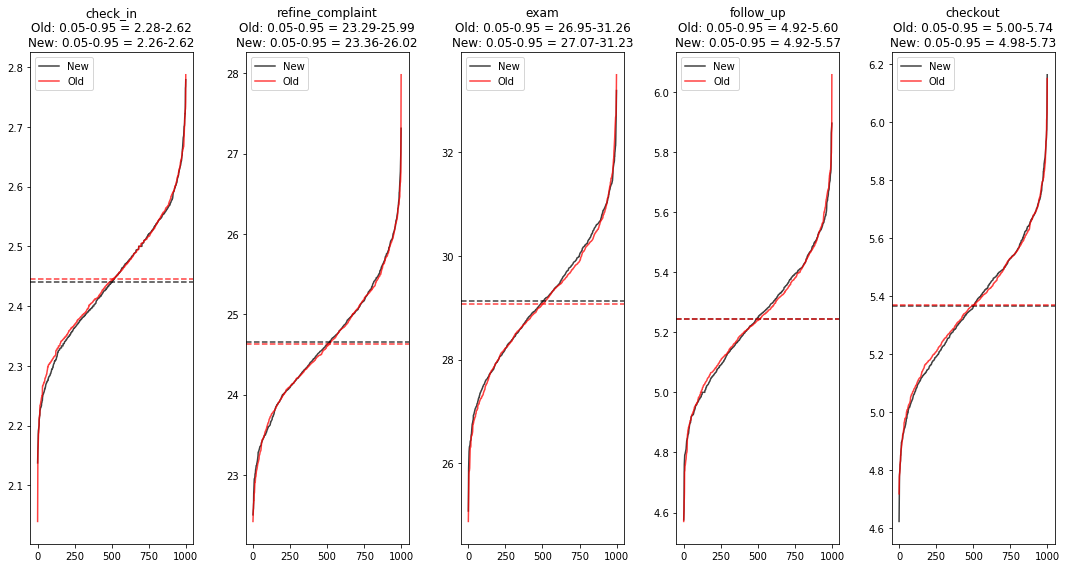

In [126]:
fig, axs = plt.subplots(ncols = 5, figsize = (15, 8))
axs = axs.ravel()
for ax, s in zip(axs, serve_times) :
    ax.set_title(s[16:] + '\nOld: 0.05-0.95 = {:.2f}-{:.2f}\nNew: 0.05-0.95 = {:.2f}-{:.2f}'\
       .format(old[s].quantile(0.05), old[s].quantile(0.95), new[s].quantile(0.05), new[s].quantile(0.95)))
    ax.plot(np.arange(0, len(new)), np.sort(new[s].values), label = 'New', c = 'k', alpha = 0.75)
    ax.plot(np.arange(0, len(old)), np.sort(old[s].values), label = 'Old', c = 'red', alpha = 0.75)
    ax.axhline(np.mean(new[s].values), c = 'k', ls = '--', alpha = 0.75)
    ax.axhline(np.mean(old[s].values), c = 'red', ls = '--', alpha = 0.75)
    ax.legend(loc = 'upper left')
plt.tight_layout()
plt.show()